### Multiple Linear Regression

As with linear regression multiple regression can be useful to make a model that predicts a dependent variable using a range of independent variables.

The geometric interpretation for two independent variables and a single dependent variable is a plane through a 3d linear space. The plane doesn't have to pass through the origin, but it should still have a z-axis and z intercept.

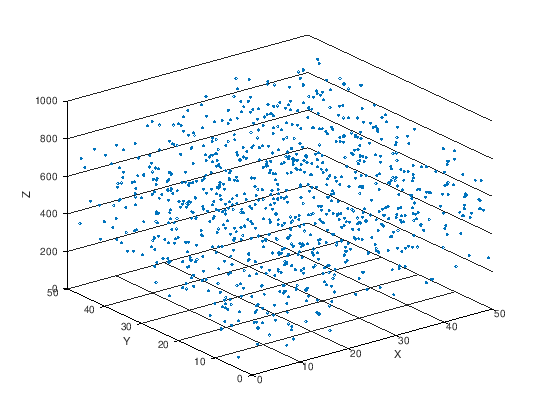

In [7]:
x = randi(50,30);
y = randi(50,30);
Z = (5*x + 5*y) + randi(500,30) ;
#points = randi(10, x)

scatter3(x,y,Z)
xlabel("X");
ylabel("Y");
zlabel("Z");


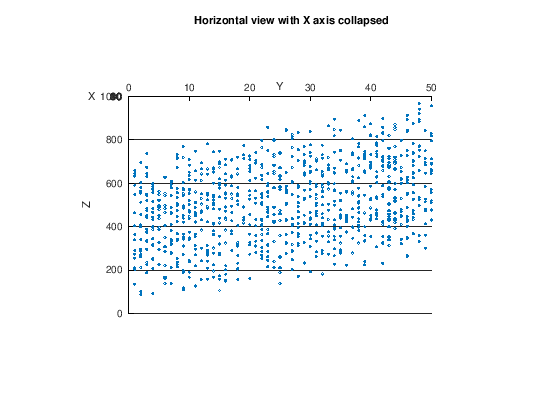

In [6]:
scatter3(x,y,Z)
title("Horizontal view with X axis collapsed")
xlabel("X");
ylabel("Y");
zlabel("Z");
view(90,0)

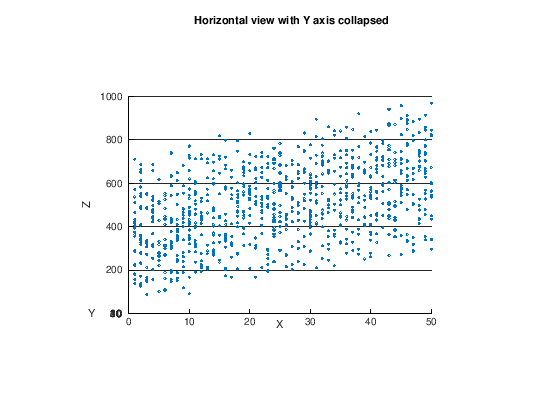

In [3]:
scatter3(x,y,Z)
title("Horizontal view with Y axis collapsed")
xlabel("X");
ylabel("Y");
zlabel("Z");
view(0,0)

With linear regression, you have a single y-intercept and a single slope. With multiple repression, we have a single intercept on the axis of the dependent variable and a slope for every independent variable:

Consider this example in 3d. Let:

$ x, y $ be the independent variables

$ \beta_0 $ be the intercept for z

$ \beta_{y} $ be the slope of x

$ \beta_{y} $ be the slope of y

$ \epsilon $ be the total value of errors, or distance of the plane away from the data

$ \forall z_i \in Z $ :

$ z_i = \beta_0 + \beta_{x} x_i + \beta_{y} y_i + \epsilon_i $

$ \epsilon_i = z_i - (\beta_0 + \beta_{x} x_i + \beta_{y} y_i) $

To get the total error, use the sum of squares:

$ \epsilon = \sum \left[ z - (\beta_0 + \beta_{x} x + \beta_{y} y) \right]^2 $


Completing this could use partial derivatives. Learn how to do this with covariance instead, similar to linear regression, because it looks much easier.